In [1]:
import pandas as pd

In [2]:
# Read the file 
data = pd.read_csv('data/data1analytical_with_avg_clust.csv')
data

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area,cluster,Price Tier
0,2022,June,4008,SWEET BAKERY SNACKS,24.0,24.40,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate
2,2022,August,5122,ΟΥΖΟ,3.0,11.00,MATYA,Kiosk,Δυτική και Κεντρική Ελλάδα,2,Moderate
3,2022,June,10254,CORN,51.0,74.00,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate
4,2022,October,10280,STICK,122.0,277.80,MATYA,Kiosk,Αττική,1,Cheap
...,...,...,...,...,...,...,...,...,...,...,...
351094,2023,March,7986,WHISKY,1.0,23.00,MAT,Mini-Market,Μακεδονία και Θράκη,2,Moderate
351095,2023,January,6532,SANDWICH,29.0,48.50,MAT,Kiosk,Νησιά,0,Expensive
351096,2023,January,3545,ICE TEA,11.0,20.00,MAT,Mini-Market,Αττική,0,Expensive
351097,2022,December,3813,COLAS,364.0,653.64,MAT,Kiosk,Πελοπόννησος,1,Cheap


## Now create a column named basket-mission for each row where:

1) If the Sub-Category is CIG then the basket-mission is Factory Cigarettes
2) If the Sub-Category is RYO or TOBACCO ACCESSORIES  then the basket-mission is Roll Your Own
3) If the Sub-Category is NATURAL WATER then the basket-mission is Natural Water
4) If the Sub-Category is CHIPS or FLAVORS then the basket-mission is Chips & Drinks
5) If the Sub-Category is ENERGY DRINK then the basket-mission is Energy Drinks
6) If the Sub-Category is BEERS or COLAS then the basket-mission is Beers
7) If the Sub-Category is HEATED then the basket-mission is Heated Devices
8) If the Sub-Category is Packaged Food then the basket-mission is Packaged Food

Keep only these basket-missions and remove the rest of the rows from the dataset

In [3]:
# Define a function to assign basket-mission based on Sub-Category
def assign_basket_mission(sub_category):
    sub_category = sub_category.strip().upper()
    if sub_category == 'CIG':
        return 'Factory Cigarettes'
    elif sub_category in ['RYO', 'TOBACCO ACCESSORIES']:
        return 'Roll Your Own'
    elif sub_category  == 'NATURAL WATER':
        return 'Natural Water'
    elif sub_category in ['CHIPS', 'FLAVORS']:
        return 'Chips & Drinks'
    elif sub_category == 'ENERGY DRINK':
        return 'Energy Drinks'
    elif sub_category in ['BEERS', 'COLAS']:
        return 'Beers'
    elif sub_category == 'HEATED':
        return 'Heated Devices'
    elif sub_category == 'PACKAGED FOOD':
        return 'Packaged Food'
    else:
        return None

# Apply the function to create the new 'basket-mission' column
data['basket-mission'] = data['Subcategory'].apply(assign_basket_mission)

# Filter the dataframe to keep only the specified basket-missions
data = data.dropna(subset=['basket-mission'])

In [4]:
data

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area,cluster,Price Tier,basket-mission
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate,Roll Your Own
7,2022,September,10812,CHIPS,489.0,895.20,MATYA,Mini-Market,Δυτική και Κεντρική Ελλάδα,1,Cheap,Chips & Drinks
9,2022,August,10812,RYO,183.0,1401.30,MATYA,Mini-Market,Δυτική και Κεντρική Ελλάδα,1,Cheap,Roll Your Own
11,2022,July,5705,HEATED,1317.0,5060.30,MATYA,Kiosk,Μακεδονία και Θράκη,1,Cheap,Heated Devices
14,2022,July,3950,RYO,1135.0,8845.30,MATYA,Kiosk,Αττική,2,Moderate,Roll Your Own
...,...,...,...,...,...,...,...,...,...,...,...,...
351063,2023,April,3484,CHIPS,122.0,197.10,MAT,Kiosk,Μακεδονία και Θράκη,1,Cheap,Chips & Drinks
351075,2023,March,6238,NATURAL WATER,969.0,1308.10,MAT,Mini-Market,Μακεδονία και Θράκη,0,Expensive,Natural Water
351077,2023,March,6582,COLAS,654.0,835.40,MAT,Kiosk,Αττική,2,Moderate,Beers
351089,2023,January,4099,FLAVORS,184.0,207.90,MAT,Mini-Market,Μακεδονία και Θράκη,2,Moderate,Chips & Drinks


In [5]:
data['basket-mission'].unique()

array(['Roll Your Own', 'Chips & Drinks', 'Heated Devices',
       'Packaged Food', 'Energy Drinks', 'Natural Water',
       'Factory Cigarettes', 'Beers'], dtype=object)

In [6]:
# Group by Price Tier and basket-mission and count each basket-mission
grouped_data = data.groupby(['Date_Year','Date_MonthName','Price Tier', 'basket-mission']).size().reset_index(name='Count')
grouped_data

,Date_Year,Date_MonthName,Price Tier,basket-mission,Count
0,2021,December,Cheap,Beers,110
1,2021,December,Cheap,Chips & Drinks,109
2,2021,December,Cheap,Energy Drinks,55
3,2021,December,Cheap,Factory Cigarettes,55
4,2021,December,Cheap,Heated Devices,55
...,...,...,...,...,...
571,2023,September,Moderate,Factory Cigarettes,100
572,2023,September,Moderate,Heated Devices,100
573,2023,September,Moderate,Natural Water,100
574,2023,September,Moderate,Packaged Food,94


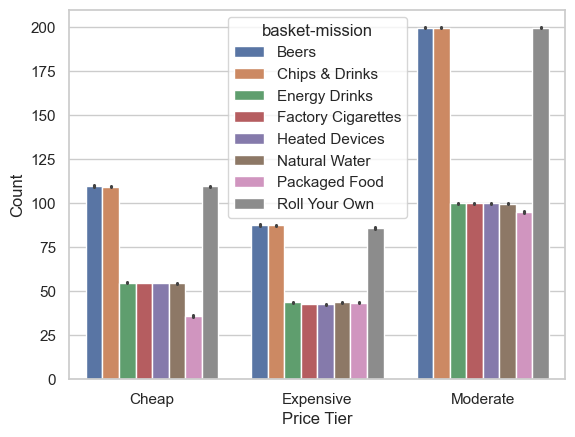

In [29]:
# Create a plot showing the count of each basket-mission for each Price Tier
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
ax = sns.barplot(x="Price Tier", y="Count", hue="basket-mission", data=grouped_data)
plt.show()

In [30]:
# Do two-way ANOVA to see if there is a significant difference in count of each basket-mission for each Price Tier
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Count ~ C(Q("basket-mission")) + C(Q("Price Tier"))', data=grouped_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                               sum_sq     df            F         PR(>F)
C(Q("basket-mission"))  622692.444444    7.0   605.617149  3.968802e-258
C(Q("Price Tier"))      650248.545139    2.0  2213.461650  2.585919e-268
Residual                 83136.899306  566.0          NaN            NaN


In [31]:
# Do cross-tabulation to see the count of each basket-mission for each Price Tier
crosstabs = pd.crosstab(grouped_data['Price Tier'], grouped_data['basket-mission'], values=grouped_data['Count'], aggfunc='sum')
crosstabs

basket-mission,Beers,Chips & Drinks,Energy Drinks,Factory Cigarettes,Heated Devices,Natural Water,Packaged Food,Roll Your Own
Price Tier,,,,,,,,
Cheap,2634,2627,1318,1313,1314,1307,858,2631
Expensive,2101,2098,1051,1028,1023,1051,1040,2061
Moderate,4791,4790,2396,2396,2396,2392,2280,4792


In [32]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstabs)
print('Chi-square statistic:', chi2)
print('p-value:', p)


Chi-square statistic: 101.43492844574267
p-value: 2.5161590317452475e-15


In [33]:
percentage_change = (crosstabs - expected) / expected * 100
percentage_change

basket-mission,Beers,Chips & Drinks,Energy Drinks,Factory Cigarettes,Heated Devices,Natural Water,Packaged Food,Roll Your Own
Price Tier,,,,,,,,
Cheap,2.071583,1.918010,2.106211,2.320109,2.484578,1.573784,-24.191395,2.406838
Expensive,-0.462680,-0.489901,-0.457102,-2.059978,-2.453971,-0.142756,12.340246,-1.925317
Moderate,-0.903718,-0.809863,-0.924636,-0.339010,-0.254783,-0.777690,7.524685,-0.444093


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:

# Assuming 'grouped_data' is your DataFrame with 'Price Tier', 'basket-mission', and 'Count' columns

# Create a pivot table for the heatmap
pivot_table = grouped_data.pivot(index='Price Tier', columns='basket-mission', values='Count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")

# Add titles and labels
plt.title('Heatmap of Count by Basket-Mission and Price Tier')
plt.xlabel('Basket-Mission')
plt.ylabel('Price Tier')

# Show the plot
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Now do seasonality analysis for each basket-mission

# Create a new column for DateTime combining Date_Year and Date_MonthName
grouped_data['DateTime'] = grouped_data['Date_Year'].astype(str) + '-' + data['Date_MonthName']
grouped_data['DateTime'] = pd.to_datetime(grouped_data['DateTime'])
grouped_data.set_index('DateTime', inplace=True)

C:\Users\panagiotis\AppData\Local\Temp\ipykernel_33696\2041231993.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grouped_data['DateTime'] = pd.to_datetime(grouped_data['DateTime'])


In [9]:
grouped_data = grouped_data.groupby(['DateTime','basket-mission']).size().reset_index(name='Count')

In [12]:
grouped_data.set_index('DateTime', inplace=True)
grouped_data

,basket-mission,Count
DateTime,,
2021-04-01,Factory Cigarettes,1
2021-04-01,Heated Devices,2
2021-04-01,Natural Water,1
2021-04-01,Packaged Food,1
2021-07-01,Factory Cigarettes,1
...,...,...
2023-11-01,Beers,2
2023-11-01,Heated Devices,1
2023-11-01,Packaged Food,1


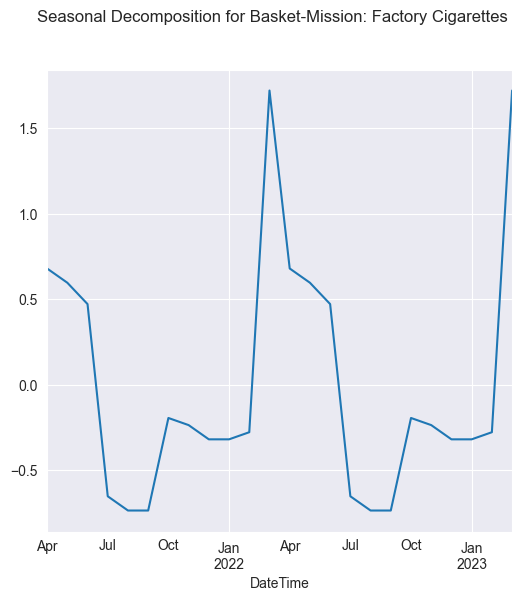

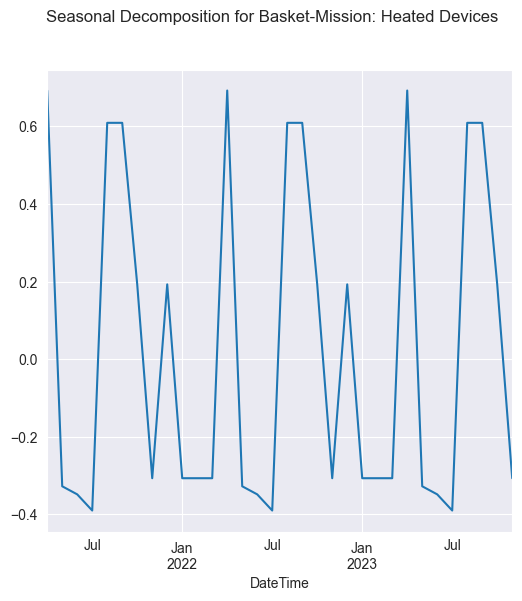

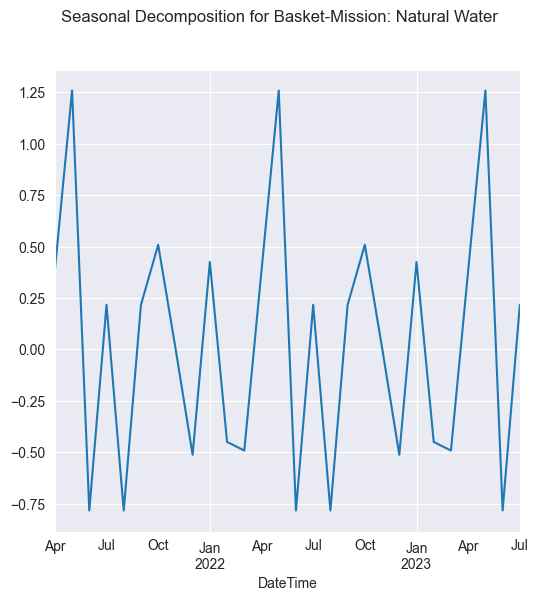

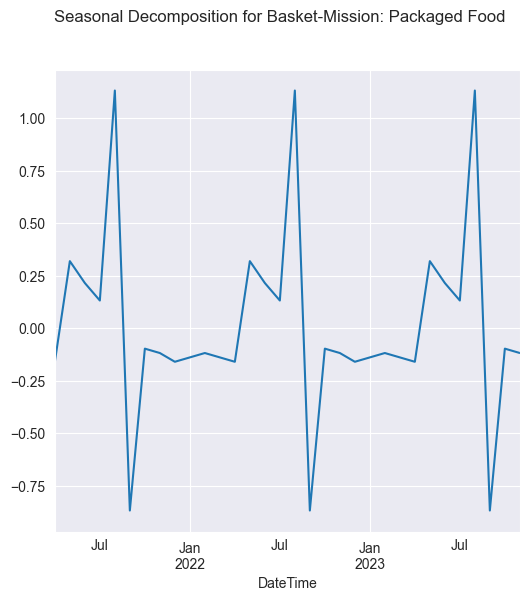

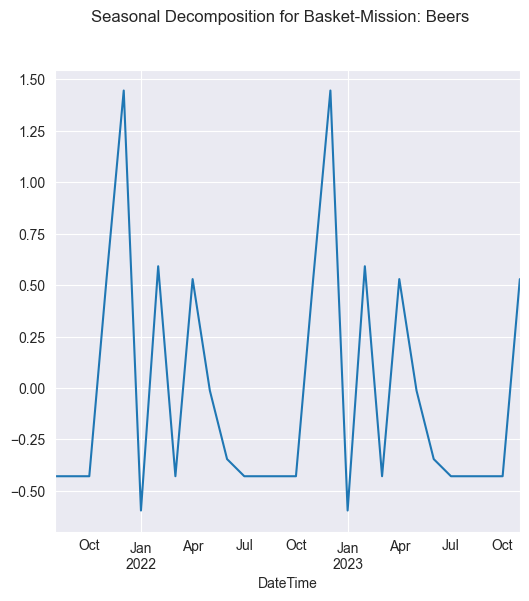

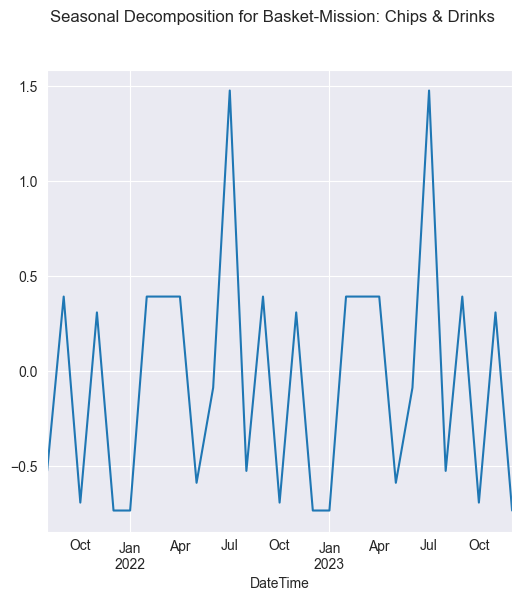

ValueError: x must have 2 complete cycles requires 24 observations. x only has 23 observation(s)

In [14]:
# Loop through each basket-mission to perform seasonal analysis
for mission in grouped_data['basket-mission'].unique():
    # Filter data for the current basket-mission
    mission_data = grouped_data[grouped_data['basket-mission'] == mission]['Count']

    # Resample the data by month and sum
    monthly_data = mission_data.resample('M').sum()

    # Decompose the time series into trend, seasonal, and residual components
    decomposition = seasonal_decompose(monthly_data, model='additive')

    # Plotting the decomposed time series components
    plt.figure(figsize=(6, 6))
    decomposition.seasonal.plot()
    plt.suptitle(f'Seasonal Decomposition for Basket-Mission: {mission}')
    plt.show()